## Using homemade function

Loss value:  0.4015411363323551
W:  [ 1.50412102 -4.07616592]


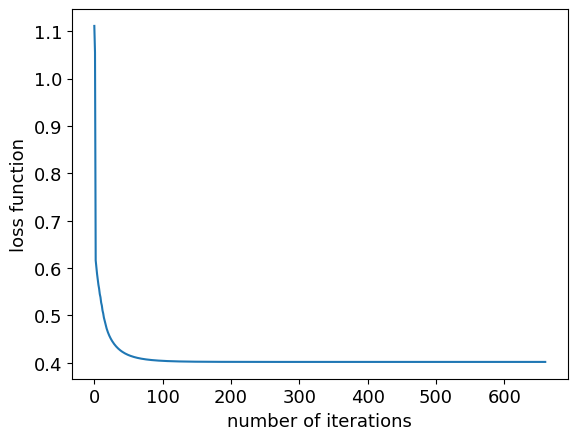

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# sigmoid function


def sigmoid(X):
    return 1/(1+np.exp(-X))

# implement logistic regression with weight decay


def loss_function(X, y, W, lam):
    n_rows, n_cols = X.shape
    Z = np.dot(X, W)
    A = sigmoid(Z)
    loss = -np.mean(y*np.log(A)+(1-y)*np.log(1-A))+1/(n_rows*2)*lam*np.sum(W*W)
    return loss


def logistic_regression(X, y, W, lam, learning_rate, num_iterations):
    _, n_cols = X.shape
    loss_hist = [loss_function(X, y, W, lam)]
    for i in range(num_iterations):
        W_old = W
        Z = np.dot(X, W)
        A = sigmoid(Z)
        dW = np.dot(X.T, (A-y))+lam*W
        W = W-learning_rate*dW
        loss_hist.append(loss_function(X, y, W, lam))
        if np.linalg.norm(W-W_old)/n_cols <= 1e-6:
            break
    return W, loss_hist


# create dataset with intercept and labels, w_init
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
               2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# bias trick
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

# initialize parameters

W_init = np.random.randn(Xbar.shape[1])
learning_rate = 0.05
num_iterations = 10000
lam = 0.0001

# train the model
W, loss_hist = logistic_regression(
    Xbar, y, W_init, lam, learning_rate, num_iterations)

# print W

print("Loss value: ",loss_function(Xbar, y, W, lam))
print("W: ", W)
plt.plot(loss_hist)
plt.xlabel('number of iterations', fontsize=13)
plt.ylabel('loss function', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()



## Using scikit-learn

In [2]:
from sklearn import linear_model

model = linear_model.LogisticRegression(penalty='l2', C=1/lam,tol=1e-6,max_iter=10000,solver='saga')

model.fit(X, y)

w2 = np.array([model.coef_[0][0], model.intercept_[0]])
print(loss_function(Xbar, y,w2, lam))
print(w2)


0.4015411444025928
[ 1.50449928 -4.07730242]
